In [10]:
from alpaca_test import get_stuff_to_trade, calculate_indicators, get_sentiment
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import configparser
import sys
import os
%matplotlib inline

In [11]:
# raw_data, symbol   = get_stuff_to_trade()
raw_data    = os.path.relpath("data/VRSK_test_data_9-20189-9-2019-15min.csv")
symbol = "VRSK"
data = calculate_indicators(raw_data, symbol)
ticker = data["ticker"]
is_bullish = data["is_bullish"]
bullish_pattern = data["bullish_pattern"]

ic = data["data"]

macd = data["macd"]
signal = data["signal"]
macd_buy_sign = data["macd_buy_sign"]
macd_mean = data["macd_10day_mean"]
signal_mean = data["signal_10day_mean"]
macd_pos_momentum = data["macd_pos_momentum"]
macd_signal_pos_momentum = data["macd_signal_pos_momentum"]

mfi = data["mfi"]
mfi_buy_sign = data["mfi_buy_sign"]
mfi_10day_mean = data["mfi_10day_mean"]
mfi_pos_momentum = data["mfi_pos_momentum"]

stoch = data["stoch"]
stoch_buy_sign = data["stoch_buy_sign"]
stoch_10day_mean = data["stoch_10day_mean"]
stoch_pos_momentum = data["stoch_pos_momentum"]

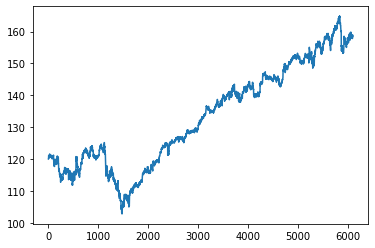

In [12]:
plt.plot(ic["close"])

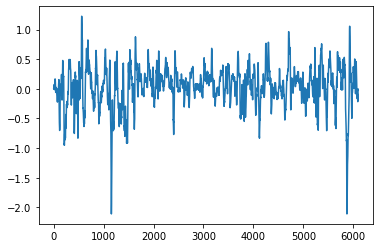

In [13]:
plt.plot(macd)

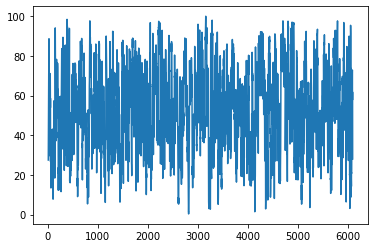

In [14]:
plt.plot(mfi)

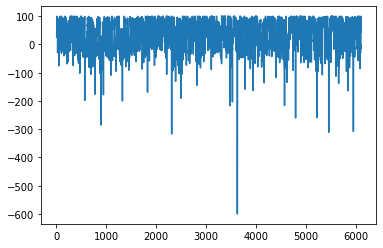

In [15]:
plt.plot(stoch)

In [16]:
macd_mean, signal_mean, macd_buy_sign

(0.04336153203362749, 0.04342120167321935, True)

In [17]:
macd_mean > signal_mean

False

In [18]:
macd_pos_momentum, macd_signal_pos_momentum

(False, True)

In [19]:
mfi_pos_momentum, mfi_buy_sign

(False, False)

In [20]:
df1 = macd[-100:]
df2 = signal[-100:]
df3 = ic[:100]
print(df1)
df1.index = df2.index
print(df2)
df1.index = df3.index
print(df3)

# fig, ax1 = plt.subplots()
# ax1.plot(df1, 'b-')
# ax2 = ax1.twinx()
# ax2.plot(df2, 'r-')
# ax3 = ax1.twinx()
# ax3.plot(df3, 'r-')
# plt.title('MACD vs Close Price')
# plt.show()

6001    0.281760
6002    0.356672
6003    0.371413
6004    0.349214
6005    0.318270
          ...   
6096   -0.107723
6097   -0.060294
6098   -0.016862
6099   -0.002187
6100   -0.011804
Name: MACD, Length: 100, dtype: float64
6001    0.119838
6002    0.167205
6003    0.208047
6004    0.236280
6005    0.252678
          ...   
6096   -0.151091
6097   -0.132931
6098   -0.109718
6099   -0.088211
6100   -0.072930
Name: SIGNAL, Length: 100, dtype: float64
                         time     open     high     low    close  volume  \
0   2018-09-24 13:00:00-04:00  120.045  119.990  120.08  119.990    1685   
1   2018-09-24 13:15:00-04:00  120.020  120.000  120.03  120.000    2329   
2   2018-09-25 09:30:00-04:00  120.480  120.025  120.48  120.025     350   
3   2018-09-25 13:30:00-04:00  121.030  120.910  121.10  120.910     993   
4   2018-09-25 13:45:00-04:00  120.925  121.050  121.05  120.925     400   
..                        ...      ...      ...     ...      ...     ...   
95  2018-10-

In [10]:
config = configparser.ConfigParser()

try:
    config.read(os.path.relpath("config.ini"))
except FileExistsError as e:
    print("FileExistsError: {}".format(e))
    sys.exit(1)
api                     = tradeapi.REST(
    base_url    = config["alpaca"]["APCA_API_BASE_URL"],
    key_id      = config["alpaca"]["APCA_API_KEY_ID"],
    secret_key  = config["alpaca"]["APCA_API_SECRET_KEY"],
    api_version = config["alpaca"]["VERSION"]
)

In [9]:
# print("RSI:         ", rsi.iloc[0])
# print("Stoch. Osc1: ", stoc.iloc[0]["SlowD"])
# print("Stoch. Osc2: ", stoc.iloc[0]["SlowK"])
# print("MACD:        ", macd.iloc[0])
# print("ROC:         ", roc.iloc[0])
# 
# print("all:         ", (rsi.iloc[0] > 80 and stoc.iloc[0] > 80 and macd.iloc[0] > 0 and roc.iloc[0] > 0))
# 

RSI:          61.7875
Stoch. Osc1:  40.7018
Stoch. Osc2:  42.1051
MACD:         -0.0481
ROC:          37.6667
all:          False


In [ ]:
# if rsi[0] > 80 and stoc[0] > 80 and macd[0] > 0 and roc[0] > 0:
# 
#     api.submit_order(
#         symbol=symbol,
#         qty=100,
#         side="sell",
#         type="limit",
#         time_in_force="opg",
#         limit_price=limit
#     )
    

In [ ]:
    # Submit a market order to buy 1 share of Apple at market price
    # api.submit_order(
    #     symbol="AAPL",
    #     qty=1,
    #     side="buy",
    #     type="market",
    #     time_in_force="gtc"
    # )

In [21]:
sent = get_sentiment(symbol)

.
